Ubuntu username & pw

jiye<br>
0730

jiye@BIG3-011:/mnt/c/Users/BIG3-011$ <span style="color:gold">**docker ps -a**<br></span>
CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES

<span style="color:gold">**docker run -p 8000:80 -t nginx**<br></span>
-t 생략 가능<br>
nginx - 이미지 이름<br>
run은 '마지막에' 이미지 이름 적어야 함<br>

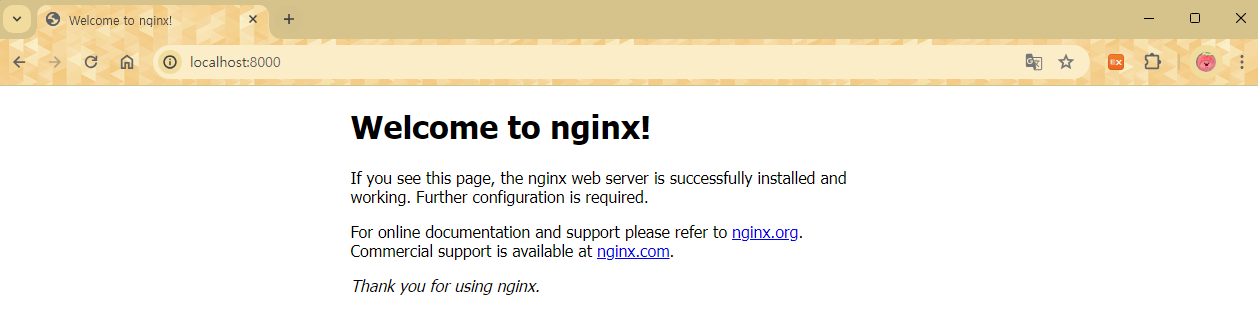<br>

start worker process 29 ~ 48 → 20줄의 worker process. CPU core(프로세서) 개수.

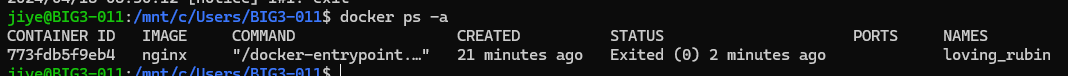

<span style="color:gold">**docker rm 컨테이너 ID(or NAME)**<br></span>
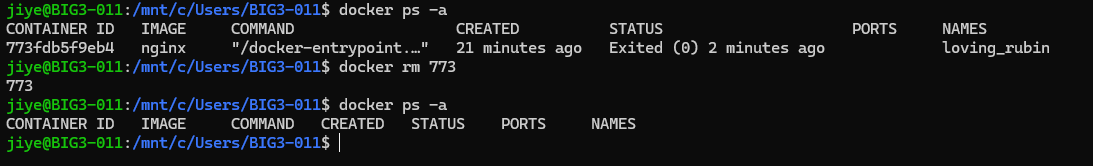<br>

**docker run <span style="color:gold">-d</span> -p 8000:80 --name nginx-container -t nginx**<br>
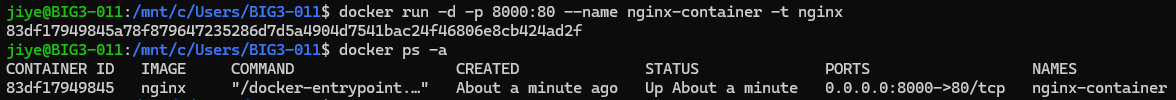<br>

**docker <span style='color:gold'>stop</span> nginx-container**<br>
runnig container는 stop하거나 force remove 해야 함<br>
**docker rm nginx-container**


<span style="color:gold">**docker images**</span><br>

8000번 포트로 접근, 내부80포트로 연결. 중복으로 사용 불가능. 포트 하나에 한 서비스. 1:1 대응.<br>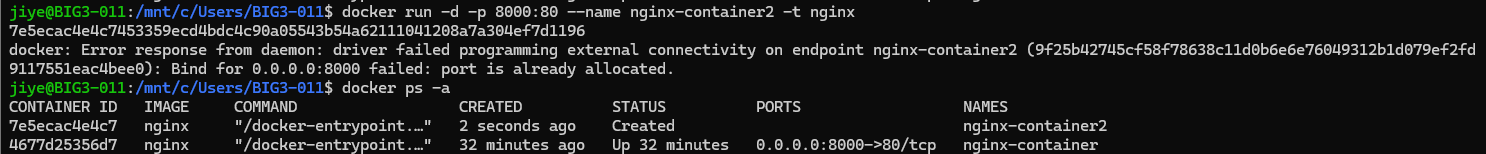<br>
<br><span style="color:gold">**docker logs 엔진이름**</span><br>
<span style="color:gold">**docker rm -f 엔진이름**</span>: 강제로 remove<br>

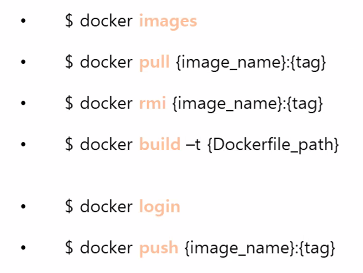<br>


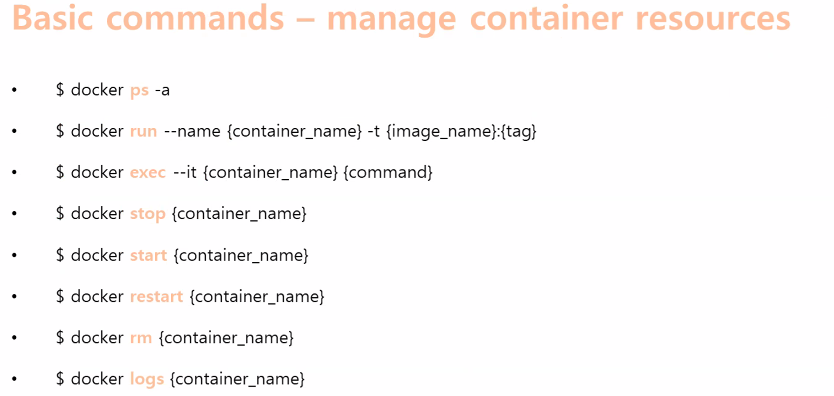<br>
docker ps -a : present status

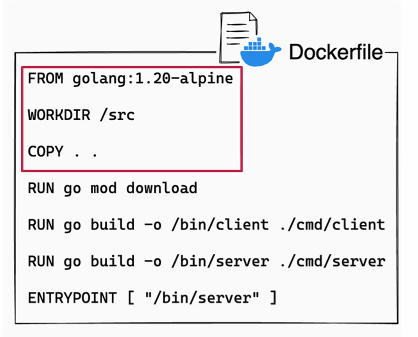

**Dockerfile**<br>
<span style='color:gold'>FROM</span> {image}:{tag} → 이미지 환경<br>
<span style='color:gold'>WORKDIR</span> {container_path} → 작업공간 디렉토리 위치 지정<br>
<span style='color:gold'>COPY</span> {host_path} {container_path} → 파일/폴더 복사<br>
"<span style='color:gold'>.</span>" → 현재 폴더 디렉토리<br>
<span style='color:gold'>RUN</span> {command} → 빌드 환경 명령어 실행<br>
<span style='color:gold'>ENTRYPOINT</span> ["command"] → container run시 항상 실행할 명령어<br>
<span style='color:gold'>CMD</span> ["command"] → default로 실행할 명령어 혹은 인자값 지정<br>
<br>
Ex 1) <span style='color:gold'>ENTRYPOINT</span> ["npm", "run", "start:dev"]<br>
Ex 2) <span style='color:gold'>ENTRYPOINT</span> ["npm", "run"]<br>　　<span style='color:gold'>CMD</span> ["start:dev"]<br>    
Ex 3) # ENTRYPOINT ["npm", "run"]<br>　　<span style='color:gold'>CMD</span> ["npm", "run", "start:dev"]<br>

FROM nginx:latest　　default <br>
FROM nginx:alpine　　가벼움

<span style='color:gold'>**docker build -t nginx-img .**</span>

#### 1-1 폴더
index.html, Dockerfile 생성<br><br>
* **index.html**<br>
I wanna eat Malatang.<br><br>
* **Dockerfile**<br>
FROM nginx:latest<br>
COPY index.html /usr/share/nginx/html/index.html
<br><br>


<span style='color:aqua'>wsl 창에서</span><br>
docker build -t nginx-img .<br>
docker images<br>
docker run -d -p 8000:80 --name nginx-container -t nginx-img <br>
&nbsp;　　　　　　　　<span style='color:peachpuff'>80:80</span>으로 해도 됨<br>
docker ps -a<br>
docker rm nginx-container<br>

<span style='color:aqua'>wsl 창에서</span><br>docker pull python:3.10.11

#### 1-2 폴더
main.py, Dockerfile 생성<br><br>
* **main.py**<br>
```py
def square(x: float, n: float = 2.) -> float: 
    return x**n

def add(x: float, y:float) -> float:
    return x +y

if __name__=="__main__":
    
    a = float(input("input a value: "))
    b = float(input("input b value: "))
    
    a_sq = square(a)
    b_sq = square(b)
    sum_result = add(a_sq, b_sq)
    result = square(sum_result, n=.5)
    print("result: ", result)
```
<br><br>
* **Dockerfile** <br>

```Docker
FROM python:3.10.11

WORKDIR /app

COPY main.py main.py
# COPY main.py /app/main.py

ENTRYPOINT [ "python", "main.py" ]
```
<br>


<span style='color:aqua'>wsl 창에서</span><br>1-2 폴더로 cd
docker build -t pytha-test .<br>
docker run -it pytha-test  　　<span style='color:forestgreen'>단발성 시행</span><br>
docker ps -a　　<span style='color:forestgreen'>STATUS - Exited</span><br>
docker run --rm -it pytha-test　　<span style='color:forestgreen'>단발성으로 시행하고 remove까지 됨</span><br>

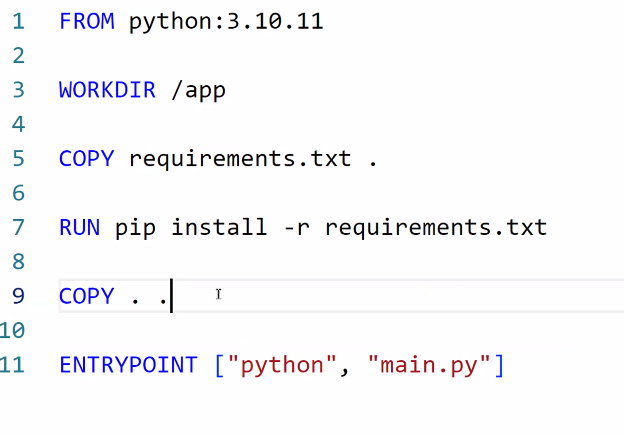

pip install 반복하는 걸 막을 수 있음

```docker
FROM python:3.10.11

WORKDIR /app

COPY main.py .
# COPY main.py /app/main.py
COPY requirements.txt .
# COPY requirements.txt /app/requirements.txt

# COPY . . 으로 해도 됨~~~~

# RUN pip install numpy
RUN pip install -r requirements.txt

ENTRYPOINT [ "python", "main.py" ]
```